In [70]:
##DATA 546 Chapter 3##

In [71]:
##Scikit-Learn provides many helper functions to download popular datasets. MNIST is one of them. The following code fetches the MNIST dataset:##

In [72]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [73]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [74]:
y.shape

(70000,)

In [75]:
##grab an instance’s feature vector, reshape it to a 28 × 28 array, and display it using Matplotlib’s imshow()##

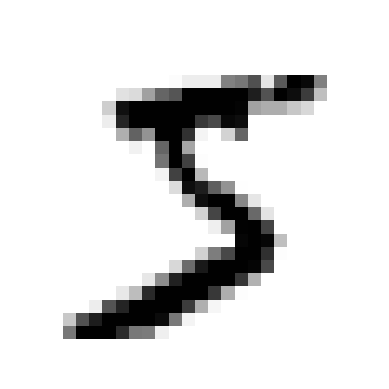

In [76]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
import numpy as np
some_digit = X.iloc[0].to_numpy()
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [77]:
y[0]

'5'

In [78]:
y = y.astype(np.uint8)

In [79]:
##Creating test set##

In [80]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [81]:
##Training a Binary Classifier##

In [82]:
##create the target vectors for this classification task:##

In [83]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

In [84]:
##Scikit-Learn’s SGDClassifier class deals with training instances independently, one at a time, capable of handling very large datasets efficiently##

In [85]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [86]:
##use it to detect images of the number 5##

In [87]:
sgd_clf.predict([some_digit])


c:\Users\huysi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [88]:
##Measuring Accuracy Using Cross-Validation##

##The following code does roughly the same thing as Scikit-Learn’s cross_val_score() function, and it prints the same result:##

In [89]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_5.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train_5.iloc[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) # prints 0.9502, 0.96565, and 0.96495

0.9669
0.91625
0.96785


In [90]:
##Let’s use the cross_val_score() function to evaluate our SGDClassifier model, using K-fold cross-validation with three folds##

In [91]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [92]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [93]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [94]:
##This demonstrates why accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets (i.e., when some classes are much more frequent than others).##

In [95]:
##Confusion Matrix##

##count the number of times instances of class A are classified as class B. For example, to know the number of times the classifier confused images of 5s with 3s, you would look in the fifth row and third column of the confusion matrix.##

In [96]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [97]:
###cross_val_predict() performs K-fold
##cross-validation, but instead of returning the evaluation scores, it returns the predictions
##made on each test fold. This means that you get a clean prediction for each
##instance in the training set (“clean” meaning that the prediction is made by a model
##that never saw the data during training).###

In [98]:
###get the confusion matrix using the confusion_matrix() function.
##Just pass it the target classes (y_train_5) and the predicted classes
##(y_train_pred):###

In [99]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [100]:
y_train_perfect_predictions = y_train_5 # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [101]:
###The confusion matrix gives you a lot of information, but sometimes you may prefer a
##more concise metric.###

In [102]:
###Precision and Recall###

In [103]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # == 4096 / (4096 + 1522)

0.8370879772350012

In [104]:
recall_score(y_train_5, y_train_pred) # == 4096 / (4096 + 1325)

0.6511713705958311

In [105]:
###Now your 5-detector does not look as shiny as it did when you looked at its accuracy.
##When it claims an image represents a 5, it is correct only 72.9% of the time. Moreover,
##it only detects 75.6% of the 5s.###

In [106]:
###To compute the F1 score, simply call the f1_score() function:###

In [107]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [108]:
###The F1 score favors classifiers that have similar precision and recall. This is not always
##what you want: in some contexts you mostly care about precision, and in other contexts
##you really care about recall.###

In [109]:
###Precision/Recall Trade-off###

In [110]:
###Scikit-Learn does not let you set the threshold directly, but it does give you access to
##the decision scores that it uses to make predictions###

In [111]:
###Instead of calling the classifier’s
##predict() method, you can call its decision_function() method, which returns a
##score for each instance, and then use any threshold you want to make predictions
##based on those scores:###

In [112]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

c:\Users\huysi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [113]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [114]:
###The SGDClassifier uses a threshold equal to 0, so the previous code returns the same
##result as the predict() method (i.e., True). Let’s raise the threshold:###

In [115]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [116]:
###use the cross_val_predict()
##function to get the scores of all instances in the training set, but this time specify that
##you want to return decision scores instead of predictions:###

In [117]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
method="decision_function")

In [118]:
###With these scores, use the precision_recall_curve() function to compute precision
##and recall for all possible thresholds:###

In [119]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

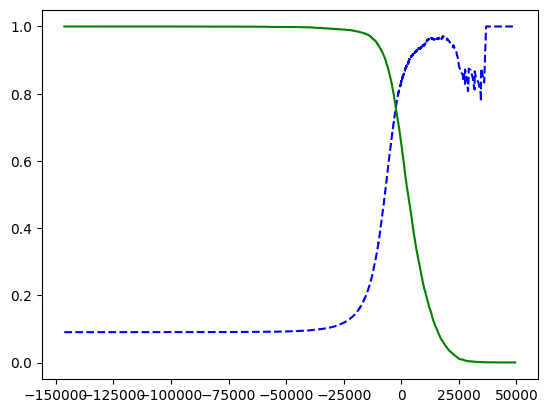

In [124]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    [...] # highlight the threshold and add the legend, axis label, and grid

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [125]:
###Suppose you decide to aim for 90% precision. You look up the first plot and find that
##you need to use a threshold of about 8,000. To be more precise you can search for the
##lowest threshold that gives you at least 90% precision (np.argmax() will give you the
##first index of the maximum value, which in this case means the first True value):###

In [126]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] # ~7816

In [127]:
###To make predictions (on the training set for now), 
# instead of calling the classifier’s
##predict() method, you can run this code:###

In [128]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [131]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [130]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [133]:
###The ROC Curve###

###The receiver operating characteristic (ROC) curve is another common tool used with
#binary classifiers. It is very similar to the precision/recall curve, but instead of plotting
#for recall) against the false positive rate (FPR).

In [134]:
###The FPR is the ratio of negative instances
##that are incorrectly classified as positive. It is equal to 1 – the true negative rate
####The TNR is also called specificity. Hence, the ROC curve plots sensitivity (recall) versus
##1 – specificity.###

In [135]:
###To plot the ROC curve, you first use the roc_curve() function to compute the TPR
##and FPR for various threshold values:###

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

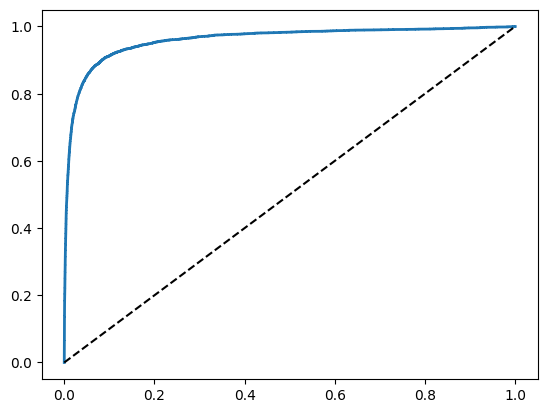

In [136]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    [...] # Add axis labels and grid

plot_roc_curve(fpr, tpr)
plt.show()

In [139]:
###One way to compare classifiers is to measure the area under the curve (AUC).
#A perfect
# classifier will have a ROC AUC equal to 1, whereas a purely random classifier will
# have a ROC AUC equal to 0.5.
###

In [138]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [140]:
###Let’s now train a RandomForestClassifier and compare its ROC curve and ROC
##AUC score to those of the SGDClassifier###

In [141]:
###The predict_proba() method returns an array containing a row per
# instance and a column per class, each containing the probability that the given
# instance belongs to the given class###

In [142]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [143]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

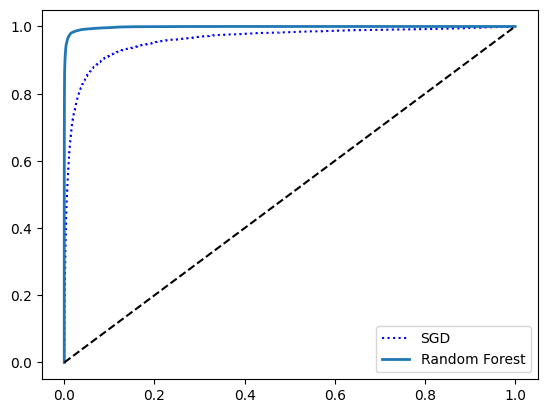

In [144]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [146]:
###Its ROC AUC score is also significantly better###

In [145]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [147]:
###Multiclass Classification###

In [148]:
##Whereas binary classifiers distinguish between two classes, multiclass classifiers (also
# called multinomial classifiers) can distinguish between more than two classes.##

In [149]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train) # y_train, not y_train_5
svm_clf.predict([some_digit])

c:\Users\huysi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [150]:
###This code trains the SVC on the training set using the original target
# classes from 0 to 9 (y_train), instead of the 5-versus-the-rest target classes
# (y_train_5). Then it makes a prediction (a correct one in this case).###

In [151]:
##If you call the decision_function() method, you will see that it returns 10 scores
# per instance (instead of just 1). That’s one score per class:##

In [152]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

c:\Users\huysi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [153]:
##The highest score is indeed the one corresponding to class 5:##

In [154]:
np.argmax(some_digit_scores)

np.int64(5)

In [155]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [156]:
svm_clf.classes_[5]

np.uint8(5)

In [157]:
###If you want to force Scikit-Learn to use one-versus-one or one-versus-the-rest, you
# can use the OneVsOneClassifier or OneVsRestClassifier classes. Simply create an
# instance and pass a classifier to its constructor.###